## 用逻辑回归制作评分卡

在银行借贷场景中，评分卡是以分数形式来衡量一个客户信用风险大小的手段，它衡量想向别人借钱的人如果不能
如期履行合同中的还本付息责任，并让借钱给别人的人造成经济损失的可能性。一般来说，评分卡打出的分数越高，
客户的信用越好，风险越小。

借钱的实体可能是指个人，也可能是指公司和企业。对于企业来说，按照融资企业的融资用途分别使用企业融资模型、现金流融资模型、项目融资模型等模型。而对于个人来说，我们有四张卡来评估个人的信用程度：A卡、B卡、C卡、F卡。A卡被称为申请评分卡或者申请者评级模型，用来帮助金融机构来判断是否应该借钱给一个新用户。如果某一个人风险太高，我们就可以拒绝贷款。

## 1 导库，获取数据



In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\DataSet\GiveMeSomeCredit\cs-training.csv",index_col=0)

In [3]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 2 探索数据与数据预处理

In [4]:
data.shape

(150000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

### 标签的含义
0     出现90天或更长时间的逾期行为   
1     贷款以及信用卡可用额度与总额度比例   
2     借款人借款年龄  
3     过去两年内出现35-59天逾期但是并没有更坏的次数  
4     每月偿还债务，赡养费，生活费用除以总收   
5     月收入  
6     开放式贷款和信贷数量  
7     过去两年内出现90天逾期或更坏的次数   
8     抵押贷款和房地产贷款数量，包括房屋净值信贷额度   
9     过去两年内出现60-89天逾期但是没有发展得更坏的次数  
10    家庭中不包括自身的家属人数（配偶、子女等）  

### 2.1 重复值的处理 

In [6]:
#检查数据是否存在重复值
data.duplicated().sum()

609

In [7]:
#去除重复值
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
#删除之后，需要重新恢复索引
data.index = range(data.shape[0])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

### 2.2 缺失值的处理

In [11]:
#检查缺失值的情况
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [12]:
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

从上面可以看到，收入和家属人数这两个字段存在缺失值。

家属人数字段的缺失很少，可以考虑之间删除或者用均值来填补。

收入字段缺失了几乎20%，并且收入对于信用评分来讲是一个很重要的因素，这个特征必须要填补。  
对于银行数据，我们可以有这样的推断：高收入或者稳定收入对于申请贷款是很有帮助的。如果是一个收入稳定良好的人，肯定会倾向于写上自己的收入情况，那么这些收入字段缺失的人，更可能是收入状况不稳定或者收入比较低的人。所以，我们可以采用四分位数来填补缺失值，把所有收入字段为空的客户都当成低收入群体。当然，也有可能这些缺失是银行数据收集过程中的失误导致的。具体采用什么样的手段来填补缺失值，要和业务人员沟通，观察缺失值是如何产生的。在这里，我们采用随机森林来填补缺失值。

In [13]:
#使用均值填补家属人数
a = data['NumberOfDependents'].mean()
data['NumberOfDependents'].fillna(a,inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [15]:
#利用随机森林来填补收入字段
#这种做法，对于某一个特征大量缺失，但是其他特征却很完整的情况比较适用

def fill_missing_rf(X,y,to_fill):
    """
    X：要填补的特征矩阵
    y：完整的、没有缺失值的标签
    to_fill：要填补的那一列的名称
    """
    
    #构建新的特征矩阵和标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    
    #找出训练集与测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]
    
    #利用随机森林来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100).fit(Xtrain,Ytrain)
    Ypredict = rfr.predict(Xtest)
    
    return Ypredict

In [16]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [17]:
X = data.iloc[:,1:]
y = data['SeriousDlqin2yrs']

In [18]:
y_pred = fill_missing_rf(X,y,'MonthlyIncome')

In [19]:
y_pred

array([0.19, 0.35, 0.11, ..., 0.19, 0.13, 0.  ])

In [20]:
data.loc[data.loc[:,'MonthlyIncome'].isnull(),'MonthlyIncome']

6        NaN
8        NaN
16       NaN
32       NaN
41       NaN
          ..
149368   NaN
149369   NaN
149376   NaN
149384   NaN
149388   NaN
Name: MonthlyIncome, Length: 29221, dtype: float64

In [21]:
data.loc[data.loc[:,'MonthlyIncome'].isnull(),'MonthlyIncome'] = y_pred

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

### 2.3 描述性统计处理异常值

现实数据中总是存在一些异常值，我们要把这些异常值捕捉出来，然后观察他们的性质。有时候，我们可能是要将这些异常值去除，而有些时候异常值则是我们的重点研究对象。

日常处理异常值，往往使用箱型图或者3sigma法则来寻找异常值。

具体到银行数据中，在特征量有限的情况下，我们往往使用描述性统计方法来观察数据的异常以及数据的分布情况。

In [23]:
#描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5429.084751,13247.395811,0.0,0.0,0.180000,1800.000000,4430.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [24]:
#可以观察到，年龄当中存在异常值。年龄的最小值居然是0，这不符合银行的业务需求，即便是儿童账户也要至少8岁
#我们可以查看一下年龄为0的人有多少
(data['age']==0).sum()

1

In [25]:
(data['age'] < 8).sum()

1

In [26]:
#最终发现只有一个人年龄为0，可以判断这是录入失误造成的，可以当成缺失值来处理，直接删掉这个样本
data = data[data['age'] != 0]

In [27]:
data[data.loc[:,'NumberOfTimes90DaysLate'] > 90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.000000
2285,0,1.0,22,98,0.0,1344.188901,0,98,0,98,0.000000
3883,0,1.0,38,98,12.0,1852.880000,0,98,0,98,0.000000
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.000000
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2368.393143,0,98,0,98,0.759863
147180,1,1.0,68,98,255.0,0.070000,0,98,0,98,0.000000
148548,1,1.0,24,98,54.0,1021.120000,0,98,0,98,0.000000
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.000000


In [28]:
data[data.loc[:,'NumberOfTimes90DaysLate'] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [29]:
data.loc[:,'NumberOfTimes90DaysLate'].value_counts()

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [30]:
#删除异常数据
data = data[data.loc[:,'NumberOfTimes90DaysLate']<90]

In [31]:
#恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

### 2.4 样本不均衡问题

In [32]:
data['SeriousDlqin2yrs'].value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [33]:
X = data.iloc[:,1:]
y = data['SeriousDlqin2yrs']

In [34]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X,y = sm.fit_sample(X,y)

Using TensorFlow backend.


In [35]:
X.shape

(278584, 10)

In [36]:
y.value_counts()

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64

### 2.5 将数据集分为测试集与验证集

In [37]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train,X_vali,Y_train,Y_vali = train_test_split(X,y,test_size=0.3)


In [38]:
Y_train

,SeriousDlqin2yrs
14213,0
23546,0
130865,0
88269,0
18403,0
...,...
162554,1
188840,1
227304,1
13932,0


In [39]:
model_data = pd.concat([Y_train,X_train],axis=1)

In [40]:
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
14213,0,0.590530,56,0,0.398862,6500.000000,7,0,2,0,0.000000
23546,0,0.989202,39,1,0.174518,4096.000000,6,0,1,0,2.000000
130865,0,0.620702,52,4,0.321444,4597.000000,6,0,0,1,1.000000
88269,0,0.658823,47,0,0.052278,7000.000000,5,1,0,0,0.000000
18403,0,0.020654,60,0,0.103547,7300.000000,9,0,1,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
162554,1,0.942355,51,1,0.104837,10103.156938,4,0,0,0,2.736922
188840,1,0.040727,44,0,0.194357,8600.000000,14,0,1,0,0.109123
227304,1,0.249643,44,1,0.369311,11371.823093,14,0,2,0,1.607698
13932,0,0.198125,29,0,0.052368,8000.000000,5,0,0,0,0.000000


In [41]:
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [42]:
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.590530,56,0,0.398862,6500.000000,7,0,2,0,0.000000
1,0,0.989202,39,1,0.174518,4096.000000,6,0,1,0,2.000000
2,0,0.620702,52,4,0.321444,4597.000000,6,0,0,1,1.000000
3,0,0.658823,47,0,0.052278,7000.000000,5,1,0,0,0.000000
4,0,0.020654,60,0,0.103547,7300.000000,9,0,1,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
195003,1,0.942355,51,1,0.104837,10103.156938,4,0,0,0,2.736922
195004,1,0.040727,44,0,0.194357,8600.000000,14,0,1,0,0.109123
195005,1,0.249643,44,1,0.369311,11371.823093,14,0,2,0,1.607698
195006,0,0.198125,29,0,0.052368,8000.000000,5,0,0,0,0.000000


In [43]:
vali_data = pd.concat([Y_vali,X_vali],axis=1)

In [44]:
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [45]:
model_data.to_csv(r"D:\DataSet\GiveMeSomeCredit\model_data.csv")
vali_data.to_csv(r"D:\DataSet\GiveMeSomeCredit\vali_data.csv")

## 3 分箱

在评分卡制作过程中一个最重要的步骤就是分箱。分箱是评分卡最难也是最核心的思路。分箱的本质就是离散化连续变量，好让拥有不同属性的人被分成不同的类别。

1.要分成多少个箱子才合适？

首先，箱子的个数不能太多，最好控制在10个以下，4到5个为最佳。另外，离散化连续型变量必然伴随着信息的损失，并且箱子越少，损失的信息越多。为了衡量特征上的信息量以及特征对预测函数的贡献，银行业定义了一个概念叫做information value(IV):

$ \mathrm{IV}=\sum_{i=1}^{\mathrm{N}}(\operatorname{good} \%-\mathrm{bad} \%) * \mathrm{WOE}_{\mathrm{i}} $

N是这个特征中分箱的个数，i代表每个箱子，good%是这个箱子内的优质客户占整个特征中所有优质客户的比例。bad%是这个箱子里的坏客户占整个特征中所有坏客户的比例。

$\mathrm{WOE}_{\mathrm{i}}=\ln \left(\frac{\operatorname{good} \%}{\mathrm{bad} \%}\right)$

这是在银行业中用来衡量违约概率的指标。中文叫做证据权重，本质其实就是优质客户比上坏客户比例的对数。对于一个箱子来说，WOE越大就说明这个箱子里的优质客户越多。IV代表的意义如下表所示：

| IV     | 特征对预测函数的贡献   |
|------  |------|
| <0.03  | 特征几乎不带有效信息，对模型没有贡献，这种特征可以被删除|
| 0.03~0.09  | 有效信息很少，对模型的贡献度低|
| 0.1~0.29  | 有效信息一般，对模型的贡献度中等|
| 0.3~0.49  | 有效信息很多，对模型的贡献度较高|
| >=0.5  | 有效信息非常多，对模型贡献超高并且可疑|

我们会对特征进行分箱，然后计算每个箱子数目下的WOE值，利用IV值的曲线，找出合适的分箱个数。

2.分箱要达成什么样的效果？

希望不同属性的人有不同的分数，因此我们希望在同一个箱子内的人的属性是尽量相似的，而不同箱子的人的属性是尽量不同的。即组间差异大，组内差异小。对于评分卡来说，我们希望一个箱子内的人违约概率是类似的，而不同箱子的人违约概率差距很大，并且每个箱子中坏客户占的比重不同。我们可以使用卡方检验来对比两个箱子的相似性。如果两个箱子之间卡方检验的P值很大，则说明他们非常相似，那我们就可以将这两个箱子合并为1个箱子。

3.基于上述的思想，我们总结出对特征进行分箱的步骤：

第一，把连续型变量分成数量较多的分类型变量，比如，将几万个样本分成100组或50组。  
第二，确保每一组中都要包含两种类别的样本，否则IV值无法计算。   
第三，对相邻的组进行卡方检验，卡方检验的P值很大的组进行合并，直到数据的组数小于设定的N箱为止。   
第四，观察不同分箱个数下IV值的变化，找出最合适的分箱个数（在信息损失尽可能小的情况下，减少分箱的个数）。  



### 3.1 人工对特征进行等频分箱
   
    pd.qcut是基于分位数的分箱函数，返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限。
    参数q:要分箱的个数。
    参数retbins=True返回结构为索引的样本索引，即生成新的一列数据。

In [46]:
model_data['age']

0         56
1         39
2         52
3         47
4         60
          ..
195003    51
195004    44
195005    44
195006    29
195007    22
Name: age, Length: 195008, dtype: int64

In [47]:
model_data['qcut'], updown = pd.qcut(model_data['age'],retbins=True,q=20)  #retbins=True

In [48]:
model_data['qcut']

0           (54.0, 56.0]
1           (36.0, 39.0]
2           (50.0, 52.0]
3           (45.0, 47.0]
4           (58.0, 61.0]
               ...      
195003      (50.0, 52.0]
195004      (43.0, 45.0]
195005      (43.0, 45.0]
195006      (28.0, 31.0]
195007    (20.999, 28.0]
Name: qcut, Length: 195008, dtype: category
Categories (20, interval[float64]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 103.0]]

In [49]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  47.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 103.])

In [50]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

In [51]:
#统计每个分箱中0,1的数量
#使用groupby
count_y0 = model_data[model_data['SeriousDlqin2yrs']==0].groupby(by='qcut').count()['SeriousDlqin2yrs']
count_y1 = model_data[model_data['SeriousDlqin2yrs']==1].groupby(by='qcut').count()['SeriousDlqin2yrs']

In [52]:
count_y0

qcut
(20.999, 28.0]    4238
(28.0, 31.0]      3602
(31.0, 34.0]      4059
(34.0, 36.0]      2906
(36.0, 39.0]      5118
(39.0, 41.0]      3972
(41.0, 43.0]      3991
(43.0, 45.0]      4387
(45.0, 47.0]      4729
(47.0, 48.0]      2446
(48.0, 50.0]      4928
(50.0, 52.0]      4652
(52.0, 54.0]      4643
(54.0, 56.0]      4505
(56.0, 58.0]      4508
(58.0, 61.0]      6626
(61.0, 64.0]      6992
(64.0, 68.0]      6664
(68.0, 74.0]      6787
(74.0, 103.0]     7720
Name: SeriousDlqin2yrs, dtype: int64

In [53]:
count_y1

qcut
(20.999, 28.0]    7580
(28.0, 31.0]      5956
(31.0, 34.0]      6820
(34.0, 36.0]      4597
(36.0, 39.0]      7554
(39.0, 41.0]      5795
(41.0, 43.0]      5633
(43.0, 45.0]      5931
(45.0, 47.0]      6357
(47.0, 48.0]      3036
(48.0, 50.0]      6222
(50.0, 52.0]      5818
(52.0, 54.0]      5033
(54.0, 56.0]      4113
(56.0, 58.0]      3419
(58.0, 61.0]      4898
(61.0, 64.0]      3217
(64.0, 68.0]      2300
(68.0, 74.0]      1878
(74.0, 103.0]     1378
Name: SeriousDlqin2yrs, dtype: int64

In [54]:
num_bins = [*zip(updown,updown[1:],count_y0,count_y1)]

In [55]:
num_bins

[(21.0, 28.0, 4238, 7580),
 (28.0, 31.0, 3602, 5956),
 (31.0, 34.0, 4059, 6820),
 (34.0, 36.0, 2906, 4597),
 (36.0, 39.0, 5118, 7554),
 (39.0, 41.0, 3972, 5795),
 (41.0, 43.0, 3991, 5633),
 (43.0, 45.0, 4387, 5931),
 (45.0, 47.0, 4729, 6357),
 (47.0, 48.0, 2446, 3036),
 (48.0, 50.0, 4928, 6222),
 (50.0, 52.0, 4652, 5818),
 (52.0, 54.0, 4643, 5033),
 (54.0, 56.0, 4505, 4113),
 (56.0, 58.0, 4508, 3419),
 (58.0, 61.0, 6626, 4898),
 (61.0, 64.0, 6992, 3217),
 (64.0, 68.0, 6664, 2300),
 (68.0, 74.0, 6787, 1878),
 (74.0, 103.0, 7720, 1378)]

In [56]:
columns = ['min','max','count_0','count_1']
df = pd.DataFrame(num_bins,columns=columns)

In [57]:
df.head()

,min,max,count_0,count_1
0,21.0,28.0,4238,7580
1,28.0,31.0,3602,5956
2,31.0,34.0,4059,6820
3,34.0,36.0,2906,4597
4,36.0,39.0,5118,7554


### 3.2 计算woe与IV值

### 3.2.1 单个示例

In [58]:
df['total'] = df.count_0 + df.count_1   #一个箱中样本的总数量
df['percentage'] = df.total / df.total.sum()    #一个箱中的样本数占全部样本总数的比例
df['bad_rate'] = df.count_1 / df.total  
df['good%'] = df.count_0 / df.count_0.sum()
df['bad%'] = df.count_1 / df.count_1.sum()
df['woe'] = np.log(df['good%']/df['bad%'])

In [59]:
df.head()

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4238,7580,11818,0.060603,0.641394,0.043479,0.077716,-0.580786
1,28.0,31.0,3602,5956,9558,0.049013,0.623143,0.036954,0.061065,-0.502274
2,31.0,34.0,4059,6820,10879,0.055787,0.626896,0.041642,0.069924,-0.518287
3,34.0,36.0,2906,4597,7503,0.038475,0.612688,0.029813,0.047132,-0.457990
4,36.0,39.0,5118,7554,12672,0.064982,0.596117,0.052507,0.077449,-0.388678


In [60]:
#计算IV值
rate = df['good%'] - df['bad%']
iv_age = np.sum(rate * df.woe)

In [61]:
iv_age

0.35768522872558517

### 3.2.2 函数实现

In [62]:
#将计算WOE与IV值的函数实现，便于复用
def get_woe(num_bins):
    columns = ['min','max','count_0','count_1']
    df = pd.DataFrame(num_bins,columns=columns)
    
    df['total'] = df.count_0 + df.count_1   #一个箱中样本的总数量
    df['percentage'] = df.total / df.total.sum()    #一个箱中的样本数占全部样本总数的比例
    df['bad_rate'] = df.count_1 / df.total  
    df['good%'] = df.count_0 / df.count_0.sum()
    df['bad%'] = df.count_1 / df.count_1.sum()
    df['woe'] = np.log(df['good%']/df['bad%'])
    
    return df

def get_iv(df):
    rate = df['good%'] - df['bad%']
    iv = np.sum(rate * df.woe)
    return iv

### 3.3 卡方检验，合并箱体，画出IV曲线

### 3.3.1 单个示例

In [63]:
import scipy
num_bins_ = num_bins.copy()
num_bins

[(21.0, 28.0, 4238, 7580),
 (28.0, 31.0, 3602, 5956),
 (31.0, 34.0, 4059, 6820),
 (34.0, 36.0, 2906, 4597),
 (36.0, 39.0, 5118, 7554),
 (39.0, 41.0, 3972, 5795),
 (41.0, 43.0, 3991, 5633),
 (43.0, 45.0, 4387, 5931),
 (45.0, 47.0, 4729, 6357),
 (47.0, 48.0, 2446, 3036),
 (48.0, 50.0, 4928, 6222),
 (50.0, 52.0, 4652, 5818),
 (52.0, 54.0, 4643, 5033),
 (54.0, 56.0, 4505, 4113),
 (56.0, 58.0, 4508, 3419),
 (58.0, 61.0, 6626, 4898),
 (61.0, 64.0, 6992, 3217),
 (64.0, 68.0, 6664, 2300),
 (68.0, 74.0, 6787, 1878),
 (74.0, 103.0, 7720, 1378)]

In [64]:
x1 = num_bins_[0][2:]
x2 = num_bins_[1][2:]

In [65]:
x1

(4238, 7580)

In [66]:
x2

(3602, 5956)

In [67]:
scipy.stats.chi2_contingency([x1,x2])

(7.500956126551887,
 0.006166624610436824,
 1,
 array([[4334.44610778, 7483.55389222],
        [3505.55389222, 6052.44610778]]))

In [68]:
#两组数之间的卡方值
scipy.stats.chi2_contingency([x1,x2])[0]

7.500956126551887

In [69]:
#p值
scipy.stats.chi2_contingency([x1,x2])[1]

#如果两个箱体之间的p值较大，说明两者相关性比较高可以进行合并。

0.006166624610436824

In [70]:
#如何得到所有相邻箱体两两之间的p值呢？
pvs = []
for i in range(len(num_bins_)-1):
    x1 = num_bins_[i][2:]
    x2 = num_bins_[i+1][2:]
    pv = scipy.stats.chi2_contingency([x1,x2])[1]
    pvs.append(pv)

In [71]:
pvs

[0.006166624610436824,
 0.5902248214442868,
 0.05285056272758867,
 0.020921104570875603,
 0.6826701248537308,
 0.2627145387280551,
 0.13756520279047227,
 0.8474537801445061,
 0.017279842172036493,
 0.6187045022138291,
 0.7391043154139746,
 4.654451206750265e-07,
 7.586538947100887e-09,
 3.36022103362482e-09,
 0.3920988766985525,
 1.21673265925683e-62,
 4.815213555236477e-19,
 5.563588326965754e-10,
 3.282225878382308e-29]

In [72]:
max(pvs)

0.8474537801445061

In [73]:
pvs.index(max(pvs))

7

In [74]:
num_bins_[7:9]

[(43.0, 45.0, 4387, 5931), (45.0, 47.0, 4729, 6357)]

In [75]:
#箱体合并
num_bins_[7:9] = [(
                  num_bins_[7][0],
                  num_bins_[8][1],
                  num_bins_[7][2]+num_bins_[8][2],
                  num_bins_[7][3]+num_bins_[8][3]
                                )]

In [76]:
#箱体合并之后的效果
num_bins_

[(21.0, 28.0, 4238, 7580),
 (28.0, 31.0, 3602, 5956),
 (31.0, 34.0, 4059, 6820),
 (34.0, 36.0, 2906, 4597),
 (36.0, 39.0, 5118, 7554),
 (39.0, 41.0, 3972, 5795),
 (41.0, 43.0, 3991, 5633),
 (43.0, 47.0, 9116, 12288),
 (47.0, 48.0, 2446, 3036),
 (48.0, 50.0, 4928, 6222),
 (50.0, 52.0, 4652, 5818),
 (52.0, 54.0, 4643, 5033),
 (54.0, 56.0, 4505, 4113),
 (56.0, 58.0, 4508, 3419),
 (58.0, 61.0, 6626, 4898),
 (61.0, 64.0, 6992, 3217),
 (64.0, 68.0, 6664, 2300),
 (68.0, 74.0, 6787, 1878),
 (74.0, 103.0, 7720, 1378)]

### 3.3.2 选择分箱个数的函数实现

In [77]:
num_bins_ = num_bins.copy()  #重新加载数据

IV = []
axisx = []

while len(num_bins_) > 2:
    pvs = []
    #获得num_bins_两两之间的卡方值
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        pvs.append(pv)
    
    #合并p值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
                  num_bins_[i][0],
                  num_bins_[i+1][1],
                  num_bins_[i][2]+num_bins_[i+1][2],
                  num_bins_[i][3]+num_bins_[i+1][3]
                                )]
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))



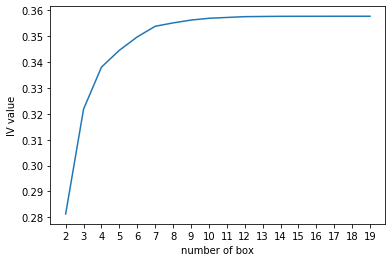

In [78]:
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel('number of box')
plt.ylabel('IV value')
plt.show()

通过图像可知，对于年龄这个特征来说，分箱的数目为6是最好的一个选择。

### 3.3.3 分箱的函数实现
       能够自动对人工分箱之后的某个特征进行卡方检验和箱体合并，最终把该特征分为n箱

In [79]:
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        #获得num_bins_两两之间的卡方值
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        #合并p值最大的两组
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                      num_bins_[i][0],
                      num_bins_[i+1][1],
                      num_bins_[i][2]+num_bins_[i+1][2],
                      num_bins_[i][3]+num_bins_[i+1][3]
                                    )]

    return num_bins_


In [80]:
num_bins_ = num_bins.copy()  #重新加载数据

afterbins = get_bin(num_bins_,6)
afterbins

[(21.0, 36.0, 14805, 24953),
 (36.0, 52.0, 34223, 46346),
 (52.0, 61.0, 20282, 17463),
 (61.0, 64.0, 6992, 3217),
 (64.0, 74.0, 13451, 4178),
 (74.0, 103.0, 7720, 1378)]

In [81]:
bins_df = get_woe(afterbins)
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14805,24953,39758,0.203879,0.627622,0.151888,0.255836,-0.521393
1,36.0,52.0,34223,46346,80569,0.413157,0.575234,0.351102,0.475173,-0.302601
2,52.0,61.0,20282,17463,37745,0.193556,0.462657,0.208078,0.179043,0.150285
3,61.0,64.0,6992,3217,10209,0.052352,0.315114,0.071733,0.032983,0.776953
4,64.0,74.0,13451,4178,17629,0.090401,0.236996,0.137997,0.042836,1.169857
5,74.0,103.0,7720,1378,9098,0.046654,0.151462,0.079201,0.014128,1.723817


### 3.4 将整个选取最佳分箱个数的过程包装为函数

In [82]:
def graphforbestbin(DF,X,Y,n=5,q=20,graph=True):
    """
    自动最优分箱函数，基于卡方检验
    
    参数：
    DF:需要输入的数据
    X:需要分箱的列名
    Y:分箱数据对应的标签
    n:保留分箱的个数
    q:初始分箱的个数
    graph:是否要画出IV图像
    
    区间为前开后闭
    
    """
    DF = DF[[X,Y]].copy()
    bins_df = 0
    
    #先把数据分成q箱
    DF['qcut'], bins = pd.qcut(DF[X],retbins=True,q=q,duplicates='drop')
    count_y0 = model_data[DF[Y]==0].groupby(by='qcut').count()[Y]
    count_y1 = model_data[DF[Y]==1].groupby(by='qcut').count()[Y]
    num_bins = [*zip(bins,bins[1:],count_y0,count_y1)]
    
    #如果某个箱子里有0，就进行合并。保证每个箱子中正负样本的数量都不为0
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(num_bins[0][0],
                              num_bins[1][1],
                              num_bins[0][2]+num_bins[1][2],
                              num_bins[0][3]+num_bins[1][3]
                             )]
            continue
            
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(num_bins[i-1][0],
                                  num_bins[i][1],
                                  num_bins[i-1][2]+num_bins[i][2],
                                  num_bins[i-1][3]+num_bins[i][3]
                                 )]
            break
        else:
            break
    
    #计算woe函数
    def get_woe(num_bins):
        columns = ['min','max','count_0','count_1']
        df = pd.DataFrame(num_bins,columns=columns)

        df['total'] = df.count_0 + df.count_1   #一个箱中样本的总数量
        df['percentage'] = df.total / df.total.sum()    #一个箱中的样本数占全部样本总数的比例
        df['bad_rate'] = df.count_1 / df.total  
        df['good%'] = df.count_0 / df.count_0.sum()
        df['bad%'] = df.count_1 / df.count_1.sum()
        df['woe'] = np.log(df['good%']/df['bad%'])
        return df
    
    #计算IV值的函数
    def get_iv(df):
        rate = df['good%'] - df['bad%']
        iv = np.sum(rate * df.woe)
        return iv
    
    #利用卡方值合并箱体，合并完毕之后计算woe与IV值。
    IV = []
    axisx = []

    while len(num_bins) > n:
        pvs = []
        #获得num_bins两两之间的卡方值
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        #合并p值最大的两组
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
                      num_bins[i][0],
                      num_bins[i+1][1],
                      num_bins[i][2]+num_bins[i+1][2],
                      num_bins[i][3]+num_bins[i+1][3]
                                    )]
        bins_df = get_woe(num_bins)
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    
    #绘图
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel('number of box')
        plt.ylabel('IV value')
        plt.show()
    
    return bins_df


In [83]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


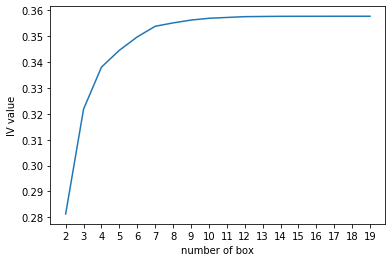

age


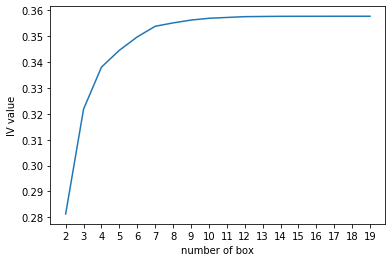

NumberOfTime30-59DaysPastDueNotWorse


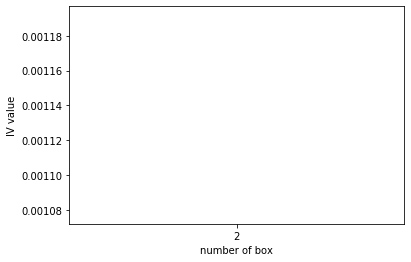

DebtRatio


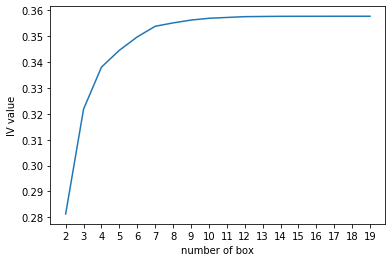

MonthlyIncome


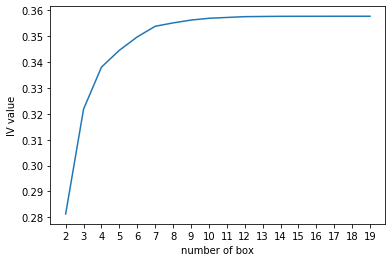

NumberOfOpenCreditLinesAndLoans


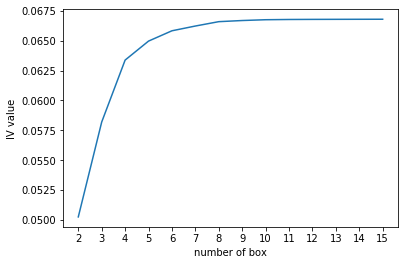

NumberOfTimes90DaysLate


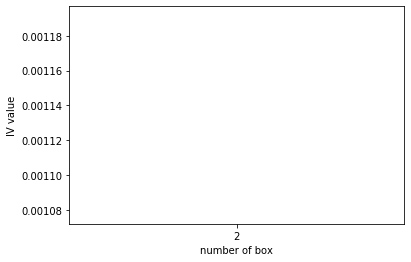

NumberRealEstateLoansOrLines


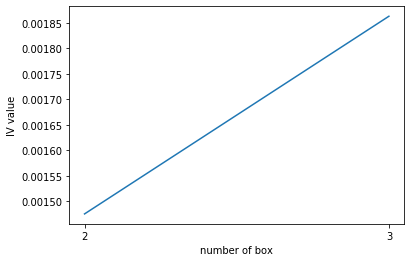

NumberOfTime60-89DaysPastDueNotWorse


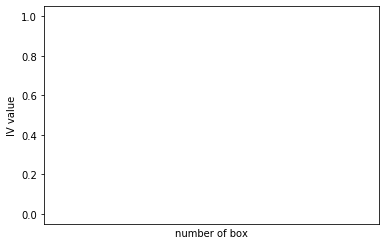

NumberOfDependents


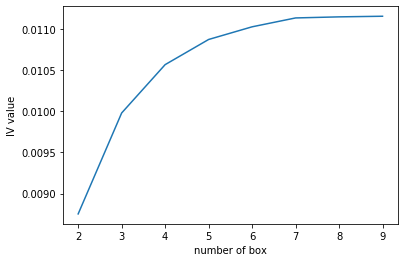

In [84]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,'SeriousDlqin2yrs',n=2,q=20)

能够正常的自动分箱的特征有：  
1 RevolvingUtilizationOfUnsecuredLines  :  6  
2 age    : 5  
3 DebtRatio   : 4  
4 MonthlyIncome    : 3   
5 NumberOfOpenCreditLinesAndLoans    : 5  

自动分箱存在问题的特征有：  
1 NumberOfTime30-59DaysPastDueNotWorse      
2 NumberOfTimes90DaysLate  
3 NumberRealEstateLoansOrLines   
4 NumberOfTime60-89DaysPastDueNotWorse  
5 NumberOfDependents  



In [85]:
auto_col_bins = {
    'RevolvingUtilizationOfUnsecuredLines':6,
    'age':5,
    'DebtRatio':4,
    'MonthlyIncome':3,
    'NumberOfOpenCreditLinesAndLoans':5
}

#对于不能自动分箱的特征，我们进行手动的设置
hand_bins = {
    'NumberOfTime30-59DaysPastDueNotWorse':[0,1,2,13],
    'NumberOfTimes90DaysLate':[0,1,2,17],
    'NumberRealEstateLoansOrLines':[0,1,2,4,54],
    'NumberOfTime60-89DaysPastDueNotWorse':[0,1,2,8],
    'NumberOfDependents':[0,1,2,3]
}



In [86]:
hand_bins.items()

dict_items([('NumberOfTime30-59DaysPastDueNotWorse', [0, 1, 2, 13]), ('NumberOfTimes90DaysLate', [0, 1, 2, 17]), ('NumberRealEstateLoansOrLines', [0, 1, 2, 4, 54]), ('NumberOfTime60-89DaysPastDueNotWorse', [0, 1, 2, 8]), ('NumberOfDependents', [0, 1, 2, 3])])

In [87]:
#为保证区间覆盖，需要使用np.inf来替换最大值，使用-n.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}
hand_bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [88]:
bins_of_col = {}

for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,
                              col,
                              'SeriousDlqin2yrs',
                              n=auto_col_bins[col],
                              q=20,
                              graph=False)
    
    #将区间上界的集合与区间下界的集合合并，并且按照从小到大进行排序
    bins_list = sorted(set(bins_df['min']).union(bins_df['max']))
    
    #为保证区间覆盖
    bins_list[0],bins_list[-1] = -np.inf, np.inf
    bins_of_col[col] = bins_list
    

In [89]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.060829122,
  0.6391491862,
  0.9345402220182801,
  0.9824579518497449,
  1.0170124050789442,
  inf],
 'age': [-inf, 36.0, 52.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.5023671412362064, 1.4736645599981109, 2342.0, inf],
 'MonthlyIncome': [-inf, 5054.0, 7754.1020069799915, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 4.0, 7.0, 12.0, 15.0, inf]}

In [90]:
#与手动分箱数据进行合并
bins_of_col.update(hand_bins)

In [91]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.060829122,
  0.6391491862,
  0.9345402220182801,
  0.9824579518497449,
  1.0170124050789442,
  inf],
 'age': [-inf, 36.0, 52.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.5023671412362064, 1.4736645599981109, 2342.0, inf],
 'MonthlyIncome': [-inf, 5054.0, 7754.1020069799915, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 4.0, 7.0, 12.0, 15.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

## 3.5 分箱，计算各箱的woe值并映射到数据中

直接用区间的话，不方便去计算评分。所以每个箱子都用它的woe值来代替。

### 3.5.1 一个实例

In [92]:
data = model_data.copy()

In [93]:
data = data[['age','SeriousDlqin2yrs']].copy()

In [94]:
#函数pd.cut，可以根据给定的间隔对数据进行分段
data['cut'] = pd.cut(data['age'],[-np.inf, 36.0, 52.0, 61.0, 74.0, np.inf])

In [95]:
data

,age,SeriousDlqin2yrs,cut
0,56,0,"(52.0, 61.0]"
1,39,0,"(36.0, 52.0]"
2,52,0,"(36.0, 52.0]"
3,47,0,"(36.0, 52.0]"
4,60,0,"(52.0, 61.0]"
...,...,...,...
195003,51,1,"(36.0, 52.0]"
195004,44,1,"(36.0, 52.0]"
195005,44,1,"(36.0, 52.0]"
195006,29,0,"(-inf, 36.0]"


In [96]:
 #将数据按分箱结果聚合，并取出其中的标签
data.groupby('cut')['SeriousDlqin2yrs'].value_counts()

cut           SeriousDlqin2yrs
(-inf, 36.0]  1                   24953
              0                   14805
(36.0, 52.0]  1                   46346
              0                   34223
(52.0, 61.0]  0                   20282
              1                   17463
(61.0, 74.0]  0                   20443
              1                    7395
(74.0, inf]   0                    7720
              1                    1378
Name: SeriousDlqin2yrs, dtype: int64

In [97]:
#使用unstack()来将树状结构变成表状结构
bins_df = data.groupby('cut')['SeriousDlqin2yrs'].value_counts().unstack()
bins_df

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 36.0]",14805,24953
"(36.0, 52.0]",34223,46346
"(52.0, 61.0]",20282,17463
"(61.0, 74.0]",20443,7395
"(74.0, inf]",7720,1378


In [98]:
#为每个箱子计算woe值
bins_df['woe'] = np.log((bins_df[0]/bins_df[0].sum()) / (bins_df[1]/bins_df[1].sum()))

In [99]:
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 36.0]",14805,24953,-0.521393
"(36.0, 52.0]",34223,46346,-0.302601
"(52.0, 61.0]",20282,17463,0.150285
"(61.0, 74.0]",20443,7395,1.017472
"(74.0, inf]",7720,1378,1.723817


### 3.5.2 用函数实现分箱，并计算woe值

In [100]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df['cut'] = pd.cut(df[col],bins)
    bins_df = df.groupby('cut')[y].value_counts().unstack()
    woe = bins_df['woe'] = np.log((bins_df[0]/bins_df[0].sum()) / (bins_df[1]/bins_df[1].sum()))
    
    return woe


In [101]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.060829122,
  0.6391491862,
  0.9345402220182801,
  0.9824579518497449,
  1.0170124050789442,
  inf],
 'age': [-inf, 36.0, 52.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.5023671412362064, 1.4736645599981109, 2342.0, inf],
 'MonthlyIncome': [-inf, 5054.0, 7754.1020069799915, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 4.0, 7.0, 12.0, 15.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [102]:
#将所有特征进行分箱，并计算每个箱的woe值
#然后，将计算出的结果存储到一个字典中

woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,'SeriousDlqin2yrs',bins_of_col[col])

woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0608]     2.440255
 (0.0608, 0.639]    0.210497
 (0.639, 0.935]    -1.204237
 (0.935, 0.982]    -1.514322
 (0.982, 1.017]    -0.645643
 (1.017, inf]      -2.099156
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.521393
 (36.0, 52.0]   -0.302601
 (52.0, 61.0]    0.150285
 (61.0, 74.0]    1.017472
 (74.0, inf]     1.723817
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.502]      0.096037
 (0.502, 1.474]    -0.468435
 (1.474, 2342.0]    0.166600
 (2342.0, inf]      0.190370
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 5054.0]       -0.122675
 (5054.0, 7754.102]    0.028997
 (7754.102, inf]       0.341839
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 4.0]    -0.361733
 (4.0, 7.0]      0.049382
 (7.0, 12.0]     0.134672
 (12.0, 15.0]    0.107402
 (15.0, inf]     0.381960
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.352366
 (0.0, 1.0]    -0.884654
 (1.0, 2.0]    -1.361314
 (2.0, inf] 

In [103]:
#将所有的woe值映射到原始数据中

#由于不希望覆盖掉原本的数据，所以我们提前创建一个原始数据索引相同的DataFrame

model_woe = pd.DataFrame(index=model_data.index)

In [104]:
model_woe

""
0
1
2
3
4
...
195003
195004
195005
195006


In [105]:
#以age特征为例，进行分箱并映射
model_woe['age'] = pd.cut(model_data['age'],bins_of_col['age']).map(woeall['age'])

In [106]:
model_woe

,age
0,0.150285
1,-0.302601
2,-0.302601
3,-0.302601
4,0.150285
...,...
195003,-0.302601
195004,-0.302601
195005,-0.302601
195006,-0.521393


In [107]:
#对所有特征进行分箱与woe映射操作
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])

In [108]:
model_woe

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.150285,0.210497,0.096037,0.028997,0.049382,0.352366,0.236487,0.628356,0.123839,0.664907
1,-0.302601,-0.645643,0.096037,-0.122675,0.049382,-0.884654,0.236487,0.196332,0.123839,-0.541251
2,-0.302601,0.210497,0.096037,-0.122675,0.049382,-1.518277,0.236487,-0.398311,-1.388992,-0.519625
3,-0.302601,-1.204237,0.096037,0.028997,0.049382,0.352366,-1.755136,-0.398311,0.123839,0.664907
4,0.150285,2.440255,0.096037,0.028997,0.134672,0.352366,0.236487,0.196332,0.123839,-0.519625
...,...,...,...,...,...,...,...,...,...,...
195003,-0.302601,-1.514322,0.096037,0.341839,-0.361733,-0.884654,0.236487,-0.398311,0.123839,-0.483366
195004,-0.302601,2.440255,0.096037,0.341839,0.107402,0.352366,0.236487,0.196332,0.123839,-0.519625
195005,-0.302601,0.210497,0.096037,0.341839,0.107402,-0.884654,0.236487,0.628356,0.123839,-0.541251
195006,-0.521393,0.210497,0.096037,0.341839,0.049382,0.352366,0.236487,-0.398311,0.123839,0.664907


In [109]:
#将标签补充到数据中
model_woe['SeriousDlqin2yrs'] = model_data['SeriousDlqin2yrs']

In [110]:
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.150285,0.210497,0.096037,0.028997,0.049382,0.352366,0.236487,0.628356,0.123839,0.664907,0
1,-0.302601,-0.645643,0.096037,-0.122675,0.049382,-0.884654,0.236487,0.196332,0.123839,-0.541251,0
2,-0.302601,0.210497,0.096037,-0.122675,0.049382,-1.518277,0.236487,-0.398311,-1.388992,-0.519625,0
3,-0.302601,-1.204237,0.096037,0.028997,0.049382,0.352366,-1.755136,-0.398311,0.123839,0.664907,0
4,0.150285,2.440255,0.096037,0.028997,0.134672,0.352366,0.236487,0.196332,0.123839,-0.519625,0


### 3.6 处理测试集

In [111]:
vali_woe = pd.DataFrame(index=vali_data.index)

In [112]:
#对测试集的所有特征进行分箱与woe映射操作
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])

#将标签补充到数据中
vali_woe['SeriousDlqin2yrs'] = vali_data['SeriousDlqin2yrs']

In [113]:
vali_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.210497,-0.521393,-0.468435,-0.122675,-0.361733,-0.884654,0.236487,-0.398311,0.123839,-0.541251,1
1,0.210497,-0.302601,0.096037,0.028997,0.049382,0.352366,0.236487,-0.398311,0.123839,-0.483366,0
2,0.210497,0.150285,-0.468435,-0.122675,0.381960,0.352366,0.236487,0.628356,0.123839,0.664907,0
3,0.210497,-0.302601,0.166600,-0.122675,0.049382,0.352366,0.236487,-0.398311,0.123839,-0.519625,1
4,-0.645643,-0.302601,0.096037,-0.122675,0.049382,-0.884654,0.236487,-0.398311,-1.757568,-0.483366,1


## 4 建模与模型验证

逻辑回归是一种名为回归的线性分类器，其本质是由线性回归变化而来的。

线性回归算法的假设函数：  
$\mathrm{y}(\mathrm{x})=\theta_{0}+\theta_{1} \mathrm{x}_{1}+\theta_{2} \mathrm{x}_{2}+\cdots+\theta_{\mathrm{n}} \mathrm{x}_{\mathrm{n}}=\theta^{\mathrm{T}} \mathrm{x}$

$\theta$被统称为模型的参数，$\theta_{0}$被称为截距（intercept），$\theta_{1}$-$\theta_{n}$被称为系数（coefficient）。

逻辑回归算法的假设函数就是在线性回归的基础上加入了Sigmoid函数：$g(z)=\frac{1}{1+e^{-z}}$，所以逻辑回归算法的假设函数为：

$\mathrm{y}(\mathrm{x})=\frac{1}{1+\mathrm{e}^{-\theta^{\mathrm{T}} \mathrm{x}}}$

y(x)的形似几率对数：$\ln (\text { odds })=\ln \left(\frac{y(x)}{1-y(x)}\right)=\theta^{T} x$。


In [114]:
#准备训练数据
x = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]

#准备测试数据
vali_x = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [115]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR()

In [116]:
lr.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
lr.score(vali_x,vali_y)

0.7689408442615104

In [118]:
#从测试结果来看，模型的准确率并不高。如何提升模型的准确度呢？
#可以通过尝试修改正则化参数来看看模型的性能
c_1 = np.linspace(0.01,1,20)

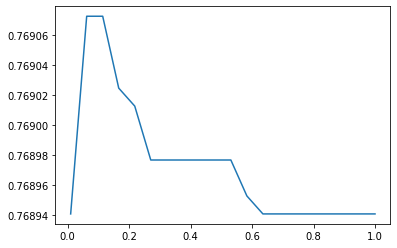

In [119]:
score = []
for i in c_1:
    lr_test = LR(solver='liblinear',C=i).fit(x,y)
    score.append(lr_test.score(vali_x,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()

In [120]:
#模型的迭代次数
lr.n_iter_

array([23])

D:\conda\envs\py36\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\conda\envs\py36\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\conda\envs\py36\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\conda\envs\py36\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\conda\envs\py36\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


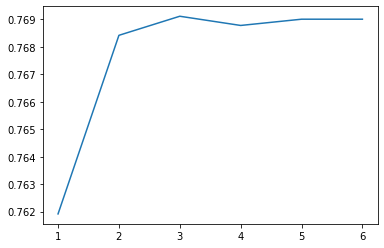

In [121]:
score = []
for i in [1,2,3,4,5,6]:
    lr_test = LR(solver='liblinear',C=0.03,max_iter=i).fit(x,y)
    score.append(lr_test.score(vali_x,vali_y))
    
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

In [122]:
import scikitplot as skplt

In [123]:
#某个标签为正例和负例的概率
lr.predict_proba(vali_x)

array([[0.12826281, 0.87173719],
       [0.37199541, 0.62800459],
       [0.76418281, 0.23581719],
       ...,
       [0.65134573, 0.34865427],
       [0.788085  , 0.211915  ],
       [0.61459587, 0.38540413]])

In [124]:
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_x))

In [125]:
vali_proba_df

,0,1
0,0.128263,0.871737
1,0.371995,0.628005
2,0.764183,0.235817
3,0.364497,0.635503
4,0.098553,0.901447
...,...,...
83571,0.789096,0.210904
83572,0.939043,0.060957
83573,0.651346,0.348654
83574,0.788085,0.211915


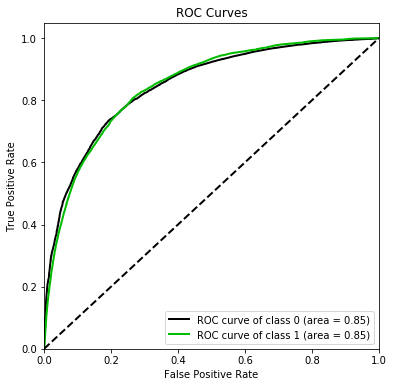

In [126]:
skplt.metrics.plot_roc(vali_y,
                       vali_proba_df,
                       plot_micro=False,
                       figsize=(6,6),
                       plot_macro=False
                      )

## 5 制作评分卡

建模完毕，我们使用准确率和ROC曲线验证了模型的预测能力。接下来要将逻辑回归转换为标准评分卡。评分卡中的分数由下面的公式计算：Score=A-B*log⁡(odds)。

其中，A叫做“补偿”，B叫做“刻度”，log(odds)代表了一个人违约的可能性。逻辑回归的结果取对数几率的形式就会得到$\theta^{\mathrm{T}} \mathrm{x}$，即模型的参数*特征矩阵，所以log(odds)其实就是我们的参数。两个常数可以通过两个假设的分值代入公式求出，这两个假设分别是：

1.某个特定的违约概率下的预期分值  
2.指定的违约概率翻倍的分数(PDO)  

例如，假设对数几率为1/60时设定的分数为600，PDO=20,那么对数几率为1/30时的分数就是620。将这两组数据代入到评分卡的数学表达式中，可以得到：

$600=A-B * \log \left(\frac{1}{60}\right)$

$620=A-B * \log \left(\frac{1}{30}\right)$




In [127]:
B = 20 / np.log(2)
A = 600 + B * np.log(1/60)

In [128]:
B,A

(28.85390081777927, 481.8621880878296)

有了A和B，分数就很容易得到了。其中不受评分卡中各个特征影响的基础分就是将模型中的截距作为log(odds)代入公式进行计算。而其他各个特征各个分档的分数也是将相应的系数代入进行计算。

In [129]:
#截距
lr.intercept_

array([0.0115637])

In [130]:
#基础分
base_score = A - B * lr.intercept_
base_score

array([481.5285301])

In [131]:
#得到某一个特征所对应的分数，以'age'为例

woeall['age']

cut
(-inf, 36.0]   -0.521393
(36.0, 52.0]   -0.302601
(52.0, 61.0]    0.150285
(61.0, 74.0]    1.017472
(74.0, inf]     1.723817
dtype: float64

In [132]:
#模型的系数
lr.coef_

array([[-0.36867239, -0.76340849, -0.92682476, -0.43870998,  0.33654074,
        -0.58586782, -0.59728913, -1.0429244 , -0.30978663, -0.85744061]])

In [133]:
x.columns

Index(['age', 'RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [134]:
#'age'所对应的系数
lr.coef_[0][0]

-0.3686723925869072

In [135]:
score_age = woeall['age'] * (-B*lr.coef_[0][1])
score_age

cut
(-inf, 36.0]   -11.484892
(36.0, 52.0]    -6.665491
(52.0, 61.0]     3.310381
(61.0, 74.0]    22.412181
(74.0, inf]     37.971058
dtype: float64

In [142]:
# #我们可以通过循环，将所有特征的评分卡内容全部一次性的写入一个本地文件ScoreData.csv

file = "D:\DataSet\GiveMeSomeCredit\ScoreData.csv"

with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
    

In [143]:
[*enumerate(x.columns)]

[(0, 'age'),
 (1, 'RevolvingUtilizationOfUnsecuredLines'),
 (2, 'DebtRatio'),
 (3, 'MonthlyIncome'),
 (4, 'NumberOfOpenCreditLinesAndLoans'),
 (5, 'NumberOfTime30-59DaysPastDueNotWorse'),
 (6, 'NumberOfTimes90DaysLate'),
 (7, 'NumberRealEstateLoansOrLines'),
 (8, 'NumberOfTime60-89DaysPastDueNotWorse'),
 (9, 'NumberOfDependents')]

In [144]:
for i,col in enumerate(x.columns):
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")